## Imports

In [82]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [83]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 2 Examine Bias and Variance for the OLS:

> (a) Investigate the unbiasedness of OLS using simulated data as follows.

>> (i) Create a random matrix ${\bf X}$ consisting of three random variables which are NID, with $X ∼ N ({\bf 0}, {\bf I})$ and sample 10 observations from each.

>> (ii) Create the true regression parameters $β_{true} = [1, 2, 3]^T$.

>> (iii) Create the response y by the linear model ${\bf y} = {\bf X}β + {\bf ε}$. Make sure the errors ε are homoscedastic and zero-mean $ε ∼ N(0,σ^2)$, where $σ^2$ denotes the noise level in the simulated data.

>> (iv) Estimate the regression coefficients $β$ from this data

In [84]:
# Create a function that takes X and beta_true as parameters and returns an estimate of the betas by simulating observed variables
def estimate_betas(X, beta_true, sigma):
    """
    Parameters:
    X (nXp matrix): feature matrix used for simulation 
    true_betas (array): array of ture betas
    sigma (float): noise level

    Returns:
    beta: the estimated betas using OLS
    """
    # Simulate observed data using the created feature matrix
    epsilon = np.random.normal(0, sigma, size=X.shape[0])
    y_real = X @ beta_true
    y_noise = y_real + epsilon

    # Estimate beta using OLS formula: beta = (X'X)^(-1)X'y
    beta_estimate = np.linalg.inv(X.T @ X) @ X.T @ y_noise
    error = np.mean(y_real - X @ beta_estimate)
    
    return beta_estimate, error

# define true betas, n and p, and sigma
beta_true = np.array([1, 2, 3])
n = 10
p = 3
sigma = 0.1

# Create a feature matrix either using np.random.normal or np.rand.randn
X = np.random.normal(0, 1, size=(n, p))

beta, error = estimate_betas(X, beta_true, sigma)
print(f'Estimated betas: {beta}, error: {error}')

Estimated betas: [1.02334836 1.91369744 3.00498209], error: -0.0347715719574689


>> (v) Repeat steps (iii)-(iv) 100 times.

In [85]:
sigma = 0.1 # noise level
m = 1000 # number of experiments

# call the method you just created 100 times and save the estimated betas
betas = []
errors = []
for i in range(m):
    beta, error = estimate_betas(X, beta_true, sigma)
    betas.append(beta)
    errors.append(error)

>> (vi) Use meaningful plots to investigate bias and variance for the model. Experiment with different noise levels $σ^2$. 

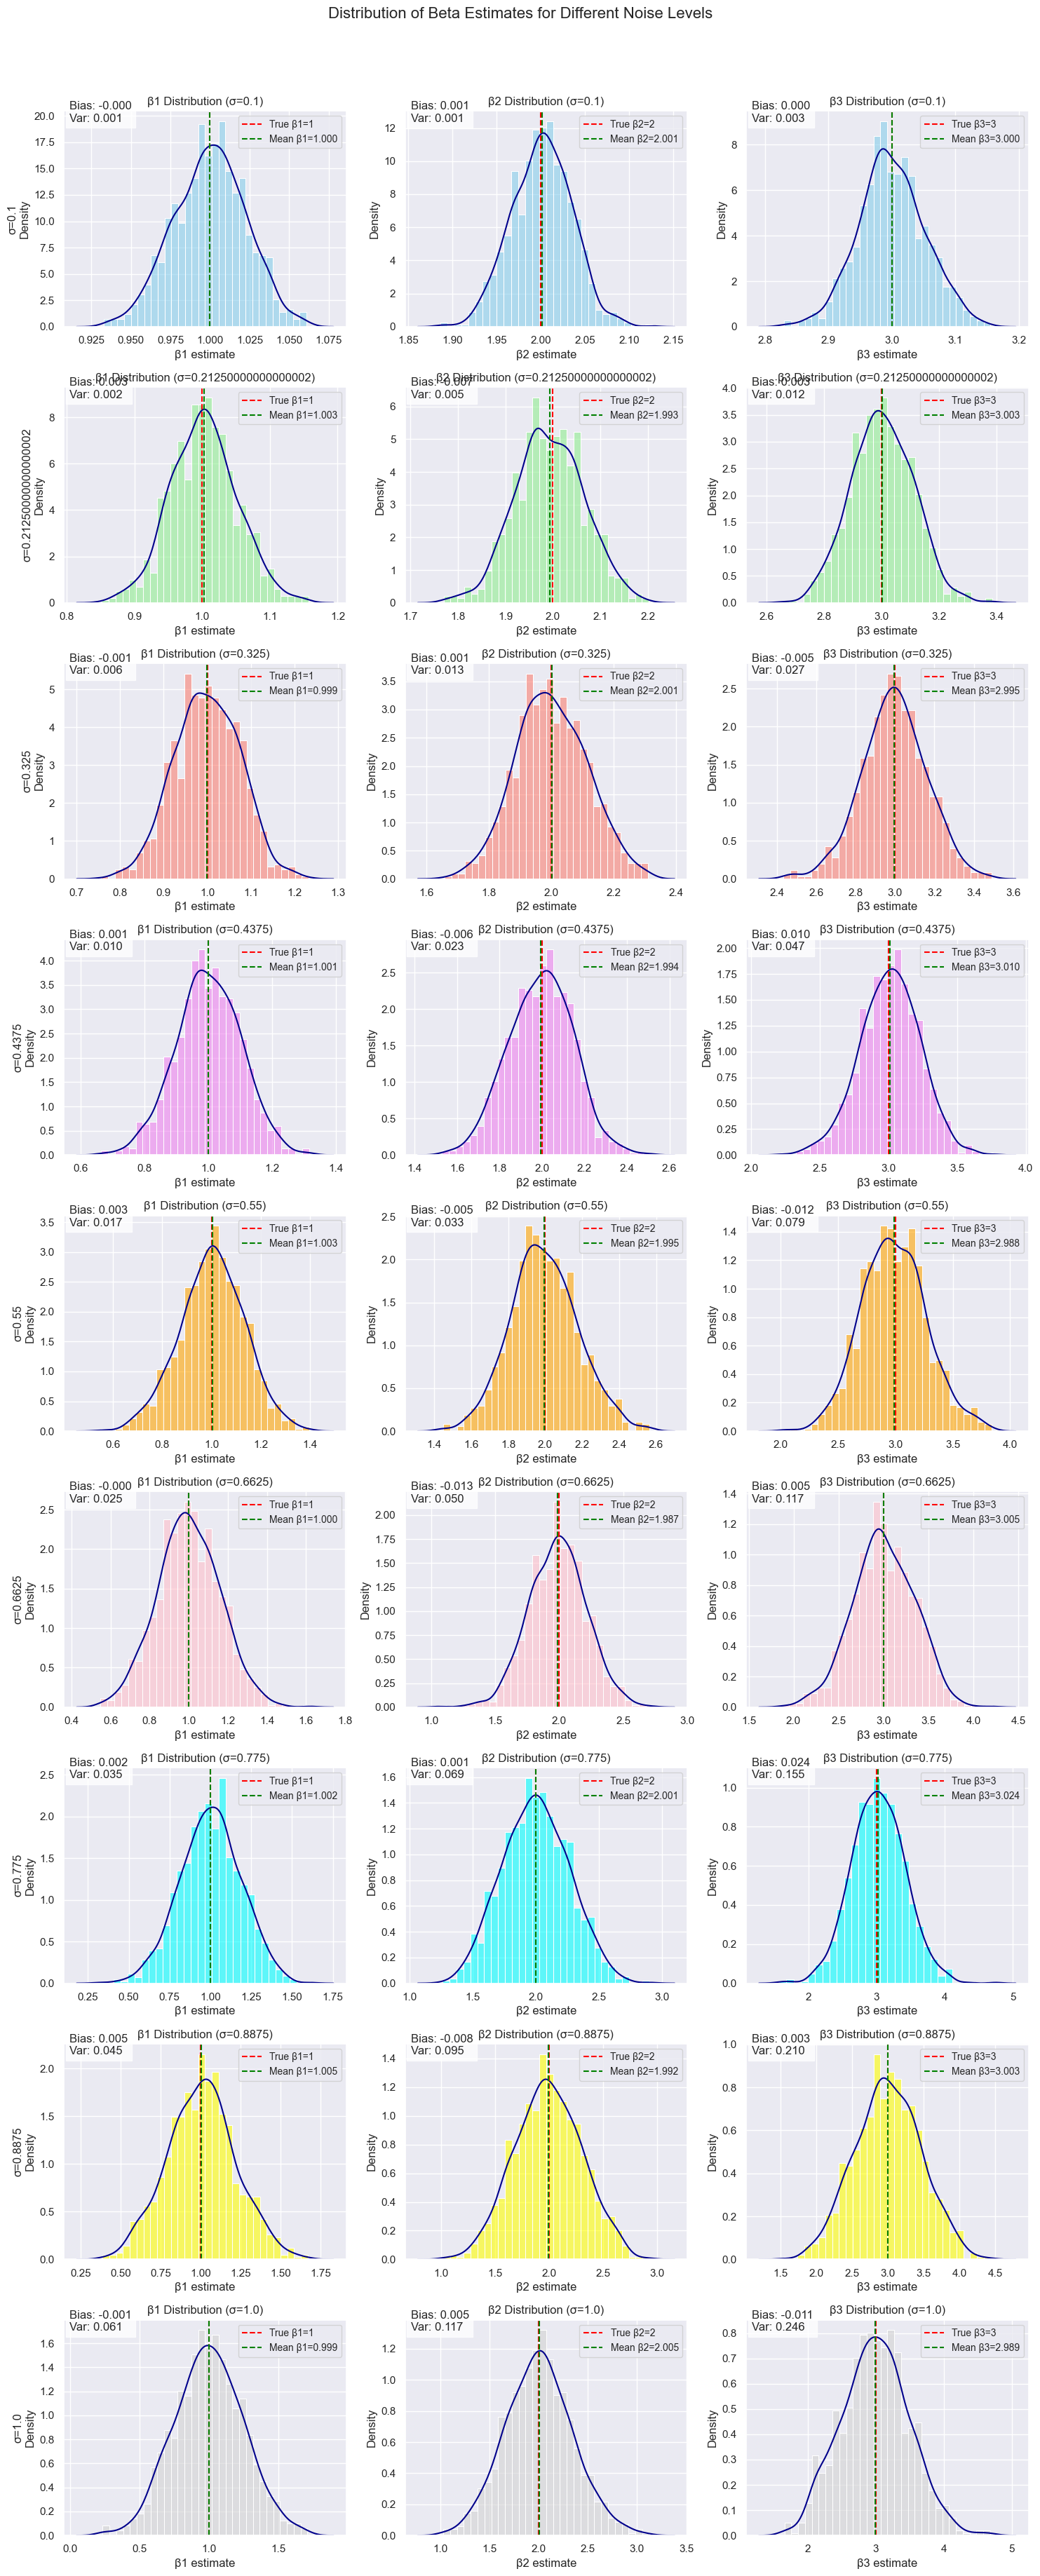


Summary Statistics:
--------------------------------------------------

Noise Level (σ) = 0.1
β1: Bias = -0.0000, Variance = 0.0005, MSE = 0.0005
β2: Bias = 0.0012, Variance = 0.0011, MSE = 0.0011
β3: Bias = 0.0001, Variance = 0.0028, MSE = 0.0028

Noise Level (σ) = 0.21250000000000002
β1: Bias = 0.0026, Variance = 0.0024, MSE = 0.0024
β2: Bias = -0.0070, Variance = 0.0052, MSE = 0.0052
β3: Bias = 0.0030, Variance = 0.0116, MSE = 0.0116

Noise Level (σ) = 0.325
β1: Bias = -0.0007, Variance = 0.0056, MSE = 0.0056
β2: Bias = 0.0012, Variance = 0.0131, MSE = 0.0131
β3: Bias = -0.0052, Variance = 0.0271, MSE = 0.0271

Noise Level (σ) = 0.4375
β1: Bias = 0.0007, Variance = 0.0103, MSE = 0.0103
β2: Bias = -0.0056, Variance = 0.0228, MSE = 0.0229
β3: Bias = 0.0101, Variance = 0.0474, MSE = 0.0475

Noise Level (σ) = 0.55
β1: Bias = 0.0032, Variance = 0.0172, MSE = 0.0172
β2: Bias = -0.0050, Variance = 0.0330, MSE = 0.0330
β3: Bias = -0.0121, Variance = 0.0793, MSE = 0.0795

Noise Level (σ) = 

In [86]:
# Investigate the betas that you have estimated from experiments with different noise levels
# Let's try different noise levels
noise_levels = np.linspace(0.1, 1, 9)  # Creates 9 equally spaced values from 0.1 to 10
betas = []
errors = []

# For each noise level, run the simulation
for i, sigma in enumerate(noise_levels):
    betas.append([])
    errors.append([])
    for _ in range(m):
        beta, error = estimate_betas(X, beta_true, sigma)
        betas[i].append(beta)
        errors[i].append(error)

# Convert betas to numpy arrays for easier indexing
betas = [np.array(beta_list) for beta_list in betas]

# Create a figure with subplots for each beta coefficient
fig, axes = plt.subplots(len(noise_levels), 3, figsize=(15, 4*len(noise_levels)))
fig.suptitle('Distribution of Beta Estimates for Different Noise Levels', fontsize=16, y=1.02)

# Colors for different noise levels
colors = ['skyblue', 'lightgreen', 'salmon', 'violet', 'orange', 'pink', 'cyan', 'yellow', 'lightgray', 'red']

# Plot for each noise level and beta coefficient
for i, sigma in enumerate(noise_levels):
    betas_array = betas[i]
    
    # Calculate mean and variance for each beta
    means = np.mean(betas_array, axis=0)
    variances = np.var(betas_array, axis=0)
    
    for j in range(3):
        ax = axes[i][j]  # Use list indexing instead of tuple indexing
        
        # Create histogram with kernel density estimate
        sns.histplot(data=betas_array[:,j], bins=30, stat='density', alpha=0.6, color=colors[i], ax=ax)
        sns.kdeplot(data=betas_array[:,j], color='darkblue', ax=ax)
        
        # Add vertical lines for true beta and mean estimate
        ax.axvline(beta_true[j], color='red', linestyle='--', label=f'True β{j+1}={beta_true[j]}')
        ax.axvline(means[j], color='green', linestyle='--', label=f'Mean β{j+1}={means[j]:.3f}')
        
        # Add title and labels
        ax.set_title(f'β{j+1} Distribution (σ={sigma})')
        ax.set_xlabel(f'β{j+1} estimate')
        if j == 0:
            ax.set_ylabel(f'σ={sigma}\nDensity')
        
        # Add bias and variance information
        bias = means[j] - beta_true[j]
        ax.text(0.02, 0.95, f'Bias: {bias:.3f}\nVar: {variances[j]:.3f}', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
        
        ax.legend(fontsize='small')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
for i, sigma in enumerate(noise_levels):
    print(f"\nNoise Level (σ) = {sigma}")
    betas_array = betas[i]
    means = np.mean(betas_array, axis=0)
    variances = np.var(betas_array, axis=0)
    biases = means - beta_true
    
    for j in range(3):
        print(f"β{j+1}: Bias = {biases[j]:.4f}, Variance = {variances[j]:.4f}, MSE = {(biases[j]**2 + variances[j]):.4f}")

[np.float64(0.006830237673037453), np.float64(0.01750236183009841), np.float64(0.030468167142197976), np.float64(0.004464186744841769), np.float64(-0.012471598276732476), np.float64(0.030503483370982454), np.float64(0.002039520322424693), np.float64(-0.018180879073528344), np.float64(0.0007772421550535924), np.float64(0.012312349043039461), np.float64(0.04003106745894973), np.float64(0.0428272065873341), np.float64(0.021212935312549374), np.float64(0.018005140851347634), np.float64(0.009548407814811411), np.float64(-0.006928692761501409), np.float64(0.019506656623933204), np.float64(-0.013674036123023403), np.float64(0.012095166936085944), np.float64(-0.024914542486040546), np.float64(0.01051733861804891), np.float64(-0.036384212184008155), np.float64(0.008124328540011615), np.float64(0.004155229529448845), np.float64(-0.002994634438678223), np.float64(-0.012239113291930481), np.float64(0.009257976168064518), np.float64(-0.003249565852345482), np.float64(-0.001375680824444947), np.floa

C:\Users\longo\AppData\Local\Temp\ipykernel_11740\1297140080.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


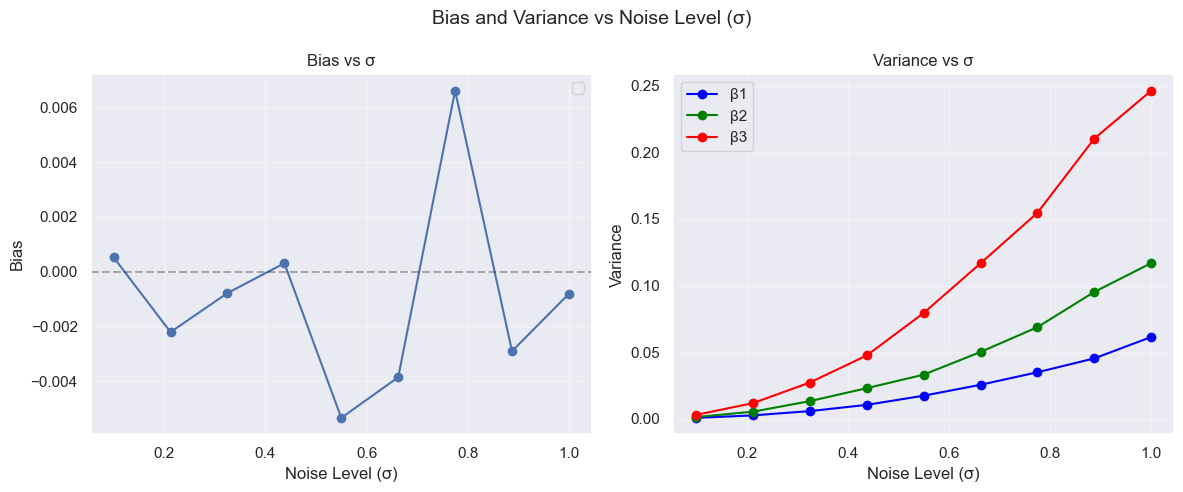

In [87]:
# Create figure for bias and variance plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Bias and Variance vs Noise Level (σ)', fontsize=14)

biases = []
for i in range(len(noise_levels)):
    _sum = 0
    print(errors[i])
    for j in range(len(errors[i])):
        _sum += errors[i][j]

    _sum /= len(errors[i])
    biases.append(_sum)

    print(_sum)
    
# Plot bias
ax1.plot(noise_levels, biases, 'o-')

# Customize bias plot
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax1.set_xlabel('Noise Level (σ)')
ax1.set_ylabel('Bias')
ax1.set_title('Bias vs σ')
ax1.grid(True, alpha=0.3)
ax1.legend()


colors = ['blue', 'green', 'red']

# For each beta coefficient
for j in range(3):
    # Calculate bias and variance for each noise level
    variances = []
    for i, sigma in enumerate(noise_levels):
        variance = np.var(betas[i][:,j])
        variances.append(variance)
    
    # Plot variance  
    ax2.plot(noise_levels, variances, 'o-', color=colors[j], label=f'β{j+1}')

# Customize variance plot
ax2.set_xlabel('Noise Level (σ)')
ax2.set_ylabel('Variance')
ax2.set_title('Variance vs σ')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


What does bias and variance mean?

Are the parameter estimates unbiased? 

What happens when you change the noise level?